In [1]:
import numpy as np
import matplotlib.pyplot as plt

nx = 10
ny = 10


Tipo_Cond = [0,0,0,1]  #0 para temperatura, 1 para flujo de calor
Cond_contor = [75,100,50,0]
#  [izquierda, arriba, derecha, abajo]



n = nx * ny
beta = nx/ny 


Matriz = np.eye(n,n)
Vector_B = np.zeros(n)


In [2]:

for i in range (1,nx-1):
    for j in range (1,ny-1):
        k = i + j * nx
        Matriz[k,k] = -2 * (beta**2 + 1) 
        Matriz[k,k+nx] = beta**2
        Matriz[k,k-nx] = beta**2
        Matriz[k,k-1] = 1
        Matriz[k,k+1] = 1


In [3]:
esquinas = np.zeros(4)
esquinas[0] = 0
esquinas[1] = nx-1
esquinas[2] = (ny-1)*nx
esquinas[3] = (nx-1) + (ny-1)*nx

In [4]:
Ta = Cond_contor [0] #izquierda
Tb = Cond_contor[1] #arriba
Tc = Cond_contor [2] #derecha
Td = Cond_contor [3] #abajo


T_prod1 = (Ta+Td)/2
T_prod2 = (Ta+Tb)/2
T_prod3 = (Tc+Tb)/2
T_prod4 = (Tc+Td)/2
T_prom = [T_prod1,T_prod2,T_prod3,T_prod4]

l = 0

for i in range (nx):
    for j in range (ny):
        k = i + j * nx
        if k in esquinas:
            Vector_B[k] = T_prom[l]
            l += 1
        elif i == 0 and 0<j<ny-1:
            Vector_B[k] = Ta
        elif i == nx-1 and 0<j<ny-1:         
            Vector_B[k] = Tc
        elif 0<i<nx-1 and j == 0:
            Vector_B[k] = Td
        elif 0<i<nx-1 and j == ny-1:
            Vector_B[k] = Tb                    

            
            
print(Vector_B)

[ 37.5   0.    0.    0.    0.    0.    0.    0.    0.   75.   75.    0.
   0.    0.    0.    0.    0.    0.    0.   50.   75.    0.    0.    0.
   0.    0.    0.    0.    0.   50.   75.    0.    0.    0.    0.    0.
   0.    0.    0.   50.   75.    0.    0.    0.    0.    0.    0.    0.
   0.   50.   75.    0.    0.    0.    0.    0.    0.    0.    0.   50.
  75.    0.    0.    0.    0.    0.    0.    0.    0.   50.   75.    0.
   0.    0.    0.    0.    0.    0.    0.   50.   75.    0.    0.    0.
   0.    0.    0.    0.    0.   50.   87.5 100.  100.  100.  100.  100.
 100.  100.  100.   25. ]


[[ 37.5          0.           0.           0.           0.
    0.           0.           0.           0.          75.        ]
 [ 75.          38.52819502  24.72611956  18.78895108  16.09515541
   15.14477239  15.69506772  18.55523658  26.71365837  50.        ]
 [ 75.          54.38666053  41.58733214  34.33452935  30.44689819
   28.78886642  29.08026192  31.81222024  38.2993969   50.        ]
 [ 75.          62.43111495  52.90201913  46.51493599  42.56904156
   40.48353319  40.02489331  41.31398553  44.671709    50.        ]
 [ 75.          67.43578016  61.07469342  56.25415392  52.83079887
   50.55133145  49.22179261  48.74711959  49.07345356  50.        ]
 [ 75.          71.23731225  67.70682048  64.59618741  61.94866855
   59.66920113  57.5638261   55.37924665  52.87498566  50.        ]
 [ 75.          74.80664838  73.91908883  72.47510669  70.69848679
   68.61297842  65.98506401  62.33105524  57.04724243  50.        ]
 [ 75.          79.07019244  80.68777976  80.68666371  79.75719

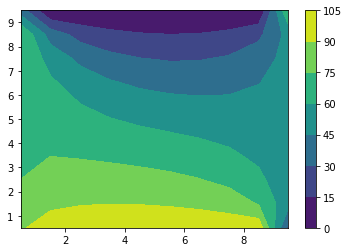

In [9]:
T = np.linalg.solve(Matriz,Vector_B)
Matriz_Temp = np.zeros([nx,ny])

for i in range (nx):
    for j in range (ny):
        k = i + j * nx
        #Matriz_Temp[ny-1-j,i] = T[k]
        #Matriz_Temp[ny-1,nx-1] = T_prod4 
        #Matriz_Temp[0,nx-1] = T_prod3 
        Matriz_Temp[j,i] = T[k]
        
        
        
print(Matriz_Temp)
plt.contourf(Matriz_Temp, origin = 'upper')
plt.colorbar()

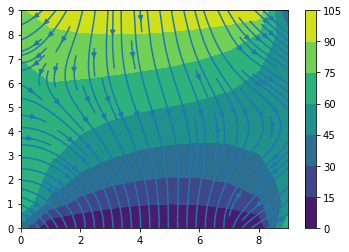

In [10]:
dx = 1/(nx+1)
dy = 1/(ny+1)
Flujox = np.zeros([nx,ny]) 
Flujoy = np.zeros([nx,ny])

x = np.linspace(0,nx-1,nx).astype(int)
y = np.linspace(0,ny-1,ny).astype(int)
X,Y = np.meshgrid(x,y)


# for i in range (1,nx-1):
#    for j in range (1,ny-1):
#        Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
#        Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)
        

        
# for i in range (nx):
#    for j in range (ny):
#        X[j,i] = i
#        Y[j,i] = j
#         X[j,i] = i*dx
#         Y[j,i] = j*dy

for i in range (nx-1):
    for j in range (ny-1):
        k = i + j * nx
        if k == esquinas[0]:
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i])/(dy)
        elif k == esquinas[1]:
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j,i-1])/(dx)
        elif k == esquinas[2]:
            Flujoy[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j-1,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j,i-1])/(dx)
        elif k == esquinas[3]:
            Flujoy[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j-1,i])/(dx)
            Flujox[j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i])/(dx)         
        elif i == 0 :
            Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
            Flujox[j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i])/(dx)
        elif i == nx-1 :         
            Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
            Flujox[j,i] = (Matriz_Temp[j,i]-Matriz_Temp[j,i-1])/(dx)
        elif j == 0:
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)
        elif j == ny-1:          
            Flujoy[j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j,i])/(dx)
            Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)
        else:
            Flujoy [j,i] = (Matriz_Temp[j+1,i]-Matriz_Temp[j-1,i])/(2*dx)
            Flujox [j,i] = (Matriz_Temp[j,i+1]-Matriz_Temp[j,i-1])/(2*dy)

plt.contourf(X,Y,Matriz_Temp, origin = 'upper')
plt.colorbar()        
plt.streamplot(X,Y,-Flujox,-Flujoy)

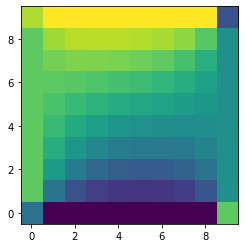

In [13]:
plt.imshow(Matriz_Temp, origin = 'lower')

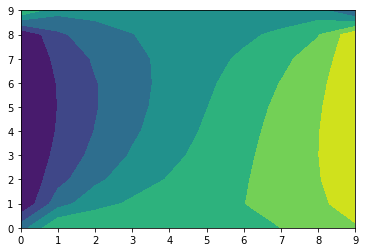

In [8]:
plt.contourf(X,Y,Matriz_Temp, origin = 'upper')